<a href="https://colab.research.google.com/github/roboy88/Future-Papal-Conclave-Predictions/blob/main/Papal_Conclave_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cardinals.csv to cardinals (3).csv

Top 10 Predicted Cardinals:

                           Name        Country  \
3    Robert Francis Prevost OSA  United States   
124           Claudio Gugerotti          Italy   
93            Sebastian Francis       Malaysia   
99     Luis Cabrera Herrera OFM        Ecuador   
86              Stephen Brislin   South Africa   
67                 Matteo Zuppi          Italy   
2            Luis Antonio Tagle    Philippines   
1               Fernando Filoni          Italy   
0                Pietro Parolin          Italy   
4          Louis Raphaël I Sako           Iraq   

                                                Office  Election_Probability  
3                 Prefect of the Dicastery for Bishops              0.428786  
124  Prefect of the Dicastery for the Eastern Churches              0.428786  
93                                    Bishop of Penang              0.106167  
99                             Archbishop of Guayaquil       

<ipython-input-15-4bb7a3b21606>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Election_Probability', y='Name', data=top_df, palette='Blues_d')


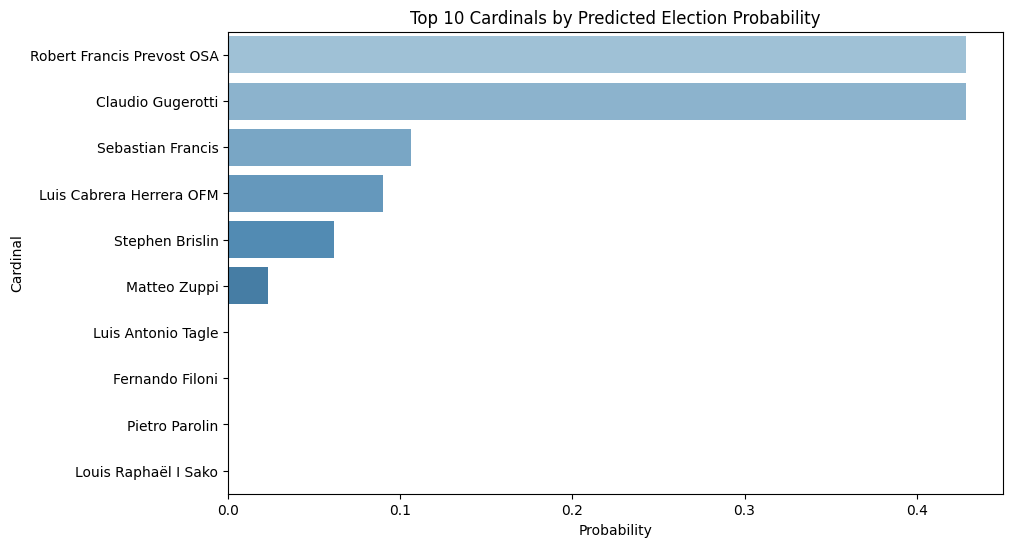


Available Cardinals:

0: Pietro Parolin
1: Fernando Filoni
2: Luis Antonio Tagle
3: Robert Francis Prevost OSA
4: Louis Raphaël I Sako
5: Vinko Puljić
6: Peter Turkson
7: Josip Bozanić
8: Philippe Barbarin
9: Péter Erdő
10: Stanisław Ryłko
11: Francisco Robles Ortega
12: Daniel DiNardo
13: Odilo Scherer
14: Robert Sarah
15: Raymond Leo Burke
16: Kurt Koch
17: Kazimierz Nycz
18: Malcolm Ranjith
19: Reinhard Marx
20: João Braz de Aviz
21: Thomas Collins
22: Wim Eijk
23: Giuseppe Betori
24: Timothy Dolan
25: Rainer Woelki
26: James Michael Harvey
27: Baselios Cleemis
28: Gerhard Ludwig Müller
29: Vincent Nichols
30: Leopoldo Brenes
31: Gérald Lacroix ISPX
32: Jean-Pierre Kutwa
33: Orani João Tempesta OCist
34: Mario Aurelio Poli
35: Philippe Ouédraogo
36: Chibly Langlois
37: Manuel Clemente
38: Berhaneyesus Demerew Souraphiel CM
39: John Dew
40: Charles Maung Bo SDB
41: Kriengsak Kovitvanit
42: Francesco Montenegro
43: Daniel Sturla SDB
44: Arlindo Gomes Furtado
45: Soane Patita Paini Ma

In [15]:
# Install dependencies
!pip install -q pandas scikit-learn matplotlib seaborn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Upload and load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("cardinals.csv")

# === Fix: Add target column ===
# Add a placeholder target column: 1 for known elected pope, 0 for others
df["Elected_Pope"] = 0
df.loc[df["Name"].str.contains("Prevost", case=False, na=False), "Elected_Pope"] = 1

# === Preprocessing ===
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)').astype(float)
df['Year_of_Consistory'] = pd.to_datetime(df['Date_of_consistory'], errors='coerce').dt.year
df['Years_as_Cardinal'] = 2025 - df['Year_of_Consistory']
df['Is_Ukraine'] = df['Country'].str.contains("Ukraine", case=False).astype(int)
df['Is_Latin_America'] = df['Country'].isin(["Brazil", "Mexico", "Argentina", "Colombia", "Peru", "Chile"]).astype(int)
df['Is_Africa'] = df['Country'].isin(["Nigeria", "Congo", "South Africa", "Kenya", "Ghana"]).astype(int)
df[['Age', 'Years_as_Cardinal']] = df[['Age', 'Years_as_Cardinal']].fillna(0)

# === Modeling ===
features = ['Age', 'Years_as_Cardinal', 'Is_Ukraine', 'Is_Latin_America', 'Is_Africa']
target = 'Elected_Pope'

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df[features], df[target])
df['Election_Probability'] = model.predict_proba(df[features])[:, 1]

# === Show top 10 ===
top_df = df[['Name', 'Country', 'Office', 'Election_Probability']].sort_values(
    by='Election_Probability', ascending=False).head(10)

print("\nTop 10 Predicted Cardinals:\n")
print(top_df)

# === Plot chart ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Election_Probability', y='Name', data=top_df, palette='Blues_d')
plt.title("Top 10 Cardinals by Predicted Election Probability")
plt.xlabel("Probability")
plt.ylabel("Cardinal")
plt.show()

# === View summary ===
print("\nAvailable Cardinals:\n")
for i, name in enumerate(df['Name']):
    print(f"{i}: {name}")

selected_index = int(input("\nEnter the number of a cardinal to view summary: "))
sel = df.iloc[selected_index]

region = (
    "Ukrainian" if sel['Is_Ukraine'] else
    "Latin American" if sel['Is_Latin_America'] else
    "African" if sel['Is_Africa'] else
    "Other"
)

print("\n--- Papal Forecast Summary ---")
print(f"Name: {sel['Name']}")
print(f"Country: {sel['Country']}")
print(f"Office: {sel['Office']}")
print(f"Predicted Chance: {sel['Election_Probability'] * 100:.1f}%")
print(f"Age: {int(sel['Age'])}")
print(f"Years as Cardinal: {int(sel['Years_as_Cardinal'])}")
print(f"Region: {region}")
